# Steps vs. Keypresses Analysis

By Kenneth Burchfiel

Released under the MIT license

This program performs a regression analysis to determine the relationship between my daily keypress count (as logged by Whatpulse), and my daily Fitbit step count. The keypress count was produced by my whatpulse_viewer Jupyter notebook, and the steps count was generated by my fitbit_steps_reader notebook.

I will add more documentation/explanation to this file later on.

In [12]:
import time
start_time = time.time() # Allows the program's runtime to be measured
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [13]:
df_daily_steps = pd.read_csv('daily_steps.csv')
df_daily_steps['Date'] = pd.to_datetime(df_daily_steps['Date'])
df_daily_steps.set_index('Date',inplace=True)
df_daily_steps

,steps,7_day_avg,30_day_avg,365_day_avg
Date,,,,
2020-01-20,528,NaN,NaN,NaN
2020-01-21,5477,NaN,NaN,NaN
2020-01-22,8475,NaN,NaN,NaN
2020-01-23,12982,NaN,NaN,NaN
2020-01-24,8431,NaN,NaN,NaN
...,...,...,...,...
2022-05-01,15240,10248.857143,9663.100000,9425.435616
2022-05-02,6711,10942.000000,9490.100000,9404.558904
2022-05-03,7737,11004.000000,9484.300000,9401.268493


In [14]:
df_combined_daily_keypresses = pd.read_csv('whatpulse_daily_keypresses.csv')

In [15]:
df_combined_daily_keypresses
df_combined_daily_keypresses['Date'] = pd.to_datetime(df_combined_daily_keypresses['Date'])
df_combined_daily_keypresses.set_index('Date',inplace=True)

In [16]:
df_combined_daily_keypresses

,keypresses,7_day_ma,30_day_ma,365_day_ma
Date,,,,
2020-09-21,19081,NaN,NaN,NaN
2020-09-22,32771,NaN,NaN,NaN
2020-09-23,32065,NaN,NaN,NaN
2020-09-24,34698,NaN,NaN,NaN
2020-09-25,47038,NaN,NaN,NaN
...,...,...,...,...
2022-07-18,46828,29888.428571,19875.566667,23327.980822
2022-07-19,38377,29546.714286,21154.800000,23313.060274
2022-07-20,31813,30630.857143,22215.233333,23358.931507


In [17]:
df_steps_keypresses = df_combined_daily_keypresses.merge(df_daily_steps,how='inner', on='Date')
df_steps_keypresses = df_steps_keypresses[['keypresses', 'steps']]
df_steps_keypresses

,keypresses,steps
Date,,
2020-09-21,19081,10044
2020-09-22,32771,1788
2020-09-23,32065,7810
2020-09-24,34698,5719
2020-09-25,47038,6801
...,...,...
2022-05-01,7976,15240
2022-05-02,39248,6711
2022-05-03,72910,7737


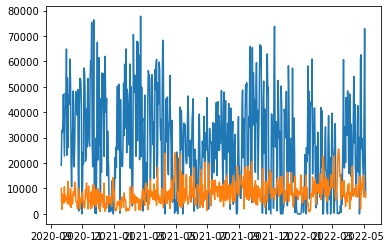

In [18]:
plt.plot(df_steps_keypresses)

In [19]:
# Based on https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html
y = df_steps_keypresses['steps']
x = df_steps_keypresses['keypresses']
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  steps   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     207.5
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           1.56e-40
Time:                        21:23:11   Log-Likelihood:                -5728.1
No. Observations:                 592   AIC:                         1.146e+04
Df Residuals:                     590   BIC:                         1.147e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.171e+04    285.401     41.027      0.000    1.11e+04    1.23e+04
keypresses    -0.1235      0.009    -14.406      0.000      -0.140      -0.107
==============================================================================
Omnibus:                       35.434   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.648
Skew:                           0.543   Prob(JB):                     3.33e-10
Kurtosis:                       3.769   Cond. No.                     5.99e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
results.params

const         11709.212108
keypresses       -0.123475
dtype: float64

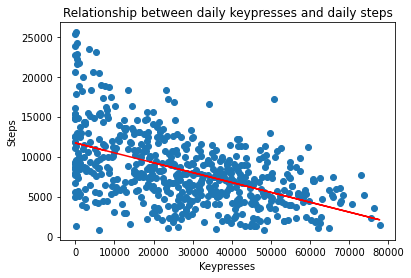

In [21]:
fig, axes = plt.subplots()
fig.set_facecolor('white')
plt.scatter(df_steps_keypresses['keypresses'], df_steps_keypresses['steps'])
# The following line of code produces the best fit line using the intercept and coefficient of the regression output.
plt.plot(df_steps_keypresses['keypresses'], results.params[0] + df_steps_keypresses['keypresses']*results.params[1], color='red')
plt.title("Relationship between daily keypresses and daily steps")
plt.xlabel('Keypresses')
plt.ylabel('Steps')
plt.savefig('graphs\\keypresses_steps_scatter.png', dpi=400)

In [22]:
end_time = time.time()
run_time = end_time - start_time
run_minutes = run_time // 60
run_seconds = run_time % 60
print("Completed run at",time.ctime(end_time),"(local time)")
print("Total run time:",'{:.2f}'.format(run_time),"second(s) ("+str(run_minutes),"minute(s) and",'{:.2f}'.format(run_seconds),"second(s))") # Only meaningful when the program is run nonstop from start to finish


Completed run at Fri Jul 22 21:23:12 2022 (local time)
Total run time: 2.00 second(s) (0.0 minute(s) and 2.00 second(s))
